<a href="https://colab.research.google.com/github/atikhasan007/Scikit-learn/blob/main/statistical%20analysis/Hypothesis_Tests_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Parametric Hypothesis Tests**

## **Assumptions for Choosing a Parametric Hypothesis Test**

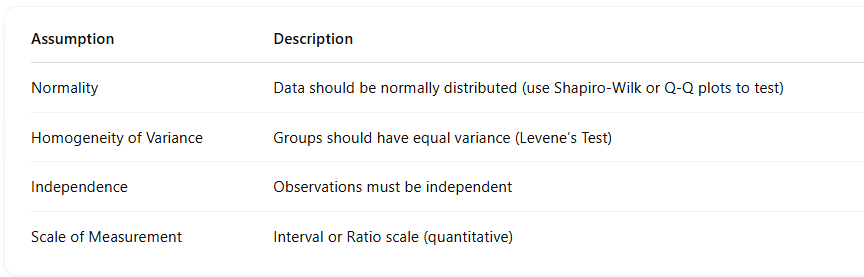

## **When to Perform which Parametrics Test?**

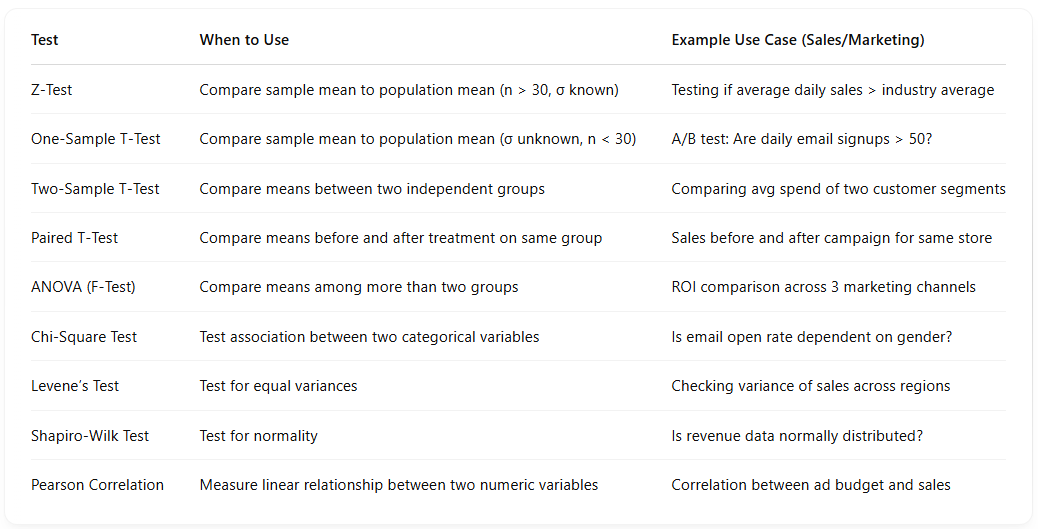

## **Generating Synthetic Data and Performing the Tests**

In [ ]:
import pandas as pd
import numpy as np

# Sample Dataset
np.random.seed(42)
sales_data = pd.DataFrame({
    'region': np.random.choice(['North', 'South', 'East', 'West'], 200),
    'campaign_type': np.random.choice(['Email', 'Social Media', 'TV'], 200),
    'before_sales': np.random.normal(1000, 200, 200),
    'after_sales': np.random.normal(1100, 250, 200),
    'email_open': np.random.choice(['Yes', 'No'], 200),
    'gender': np.random.choice(['Male', 'Female'], 200),
    'ad_spend': np.random.normal(5000, 1500, 200),
    'revenue': np.random.normal(7000, 1800, 200),
})


In [ ]:
sales_data.head(10)

,region,campaign_type,before_sales,after_sales,email_open,gender,ad_spend,revenue
0,East,TV,1094.647525,1185.438994,No,Female,5280.150147,4254.054692
1,West,TV,985.434217,1569.042710,Yes,Male,3866.925601,5754.565474
2,North,Email,830.641256,1337.605960,Yes,Male,4082.723296,6917.945171
3,East,Email,697.030555,955.774086,Yes,Female,2890.008355,7438.011009
4,East,Social Media,910.697010,875.396332,Yes,Female,3615.150131,6565.775096
5,West,Email,1171.279759,1222.979793,Yes,Female,2972.473092,7633.699714
6,North,TV,1042.818749,769.941698,Yes,Female,3536.190121,4747.229036
7,North,TV,750.852244,1557.864691,Yes,Male,6580.462695,9598.776287
8,East,Email,1034.636185,1394.860030,No,Female,3575.901667,6852.127879
9,South,TV,1077.063476,982.706087,No,Female,8948.573097,9011.132497


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   region         200 non-null    object 
 1   campaign_type  200 non-null    object 
 2   before_sales   200 non-null    float64
 3   after_sales    200 non-null    float64
 4   email_open     200 non-null    object 
 5   gender         200 non-null    object 
 6   ad_spend       200 non-null    float64
 7   revenue        200 non-null    float64
dtypes: float64(4), object(4)
memory usage: 12.6+ KB


### **Shapiro-Wilk Test for Normality**

**When to Use:** Validate normality of a sample

**Hypotheses:**

H₀: Data is normal

H₁: Data is not normal

In [ ]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Check if revenue is normally distributed
stat, p = shapiro(sales_data['revenue'])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Likely normal (p > 0.05)")
else:
    print("❌ Not normal (p < 0.05)")


Shapiro-Wilk Test: Statistic=0.9895, p-value=0.1488
✔️ Likely normal (p > 0.05)


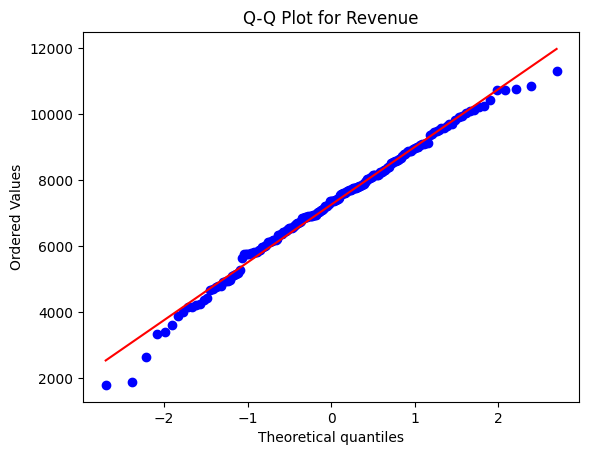

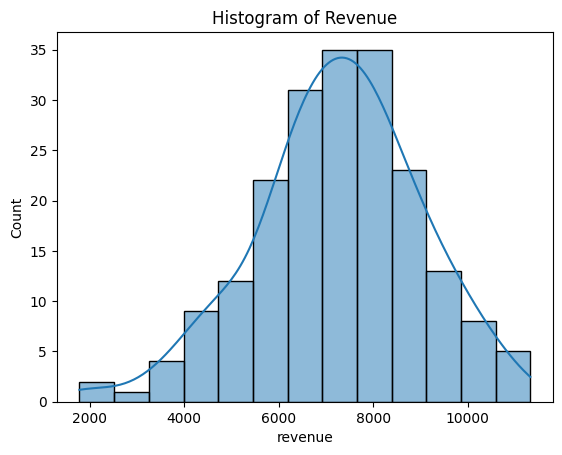

In [ ]:
# Q-Q plot
stats.probplot(sales_data['revenue'], dist="norm", plot=plt)
plt.title("Q-Q Plot for Revenue")
plt.show()

# Histogram
sns.histplot(sales_data['revenue'], kde=True)
plt.title("Histogram of Revenue")
plt.show()


###**Levene’s Test for Equal Variance [Homogeneity of Variance]**

In [ ]:
from scipy.stats import levene

# Revenue across two regions
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']

stat, p = levene(north, south)
print(f"Levene’s Test: Statistic={stat:.4f}, p-value={p:.4f}")
if p > 0.05:
    print("✔️ Equal variance (p > 0.05)")
else:
    print("❌ Unequal variance (p < 0.05)")



Levene’s Test: Statistic=0.0177, p-value=0.8946
✔️ Equal variance (p > 0.05)


###**1. Two-Sample T-Test (Independent Groups)**

**When to Use:** Compare means of two independent groups (e.g., Region A vs Region B)

**Assumptions:**

✅ Data in both groups is normally distributed (Shapiro-Wilk)

✅ Equal variances (Levene's Test)

✅ Independent groups

**Hypotheses:**

H₀: μ₁ = μ₂ (no difference in means)

H₁: μ₁ ≠ μ₂ (means are different)


**Interpretation:**

If p < 0.05 → reject H₀ → there is a statistically significant difference in revenue between North and South.

In [ ]:
from scipy.stats import ttest_ind

# Step 1: Check normality
for x in ['North', 'South']:
    stat, p = shapiro(sales_data[sales_data['region'] == x]['revenue'])
    print(f"{x} Shapiro-Wilk p = {p:.4f}")

# Step 2: Check variance equality
north = sales_data[sales_data['region'] == 'North']['revenue']
south = sales_data[sales_data['region'] == 'South']['revenue']
stat, p = levene(north, south)
print(f"Levene’s p = {p:.4f}")

# Step 3: Perform t-test
stat, p = ttest_ind(north, south, equal_var=(p > 0.05))
print(f"t-test: Statistic = {stat:.4f}, p-value = {p:.4f}")


North Shapiro-Wilk p = 0.7515
South Shapiro-Wilk p = 0.1066
Levene’s p = 0.8946
t-test: Statistic = 0.9304, p-value = 0.3546


In [ ]:
north.mean()

np.float64(7489.757502768552)

In [ ]:
south.mean()

np.float64(7166.511661127144)

**Since the p-value of the Independent Sample t-test is greater than 0.05 (0.355) we can conclude that the test is insigficant at 5% level of significance. Hence, the Average Revenue of North and South group isn't significantly different at 5% level of significance.**

###**2. Paired T-Test (Before vs After Campaign)**

**When to Use:** Compare before/after sales in the same region

**Assumptions:**

- Normality of the differences

- Paired data (dependent samples)

**Hypotheses:**

H₀: μ₁ - μ₂ = 0

H₁: μ₁ - μ₂ ≠ 0

In [ ]:
from scipy.stats import ttest_rel

t_stat, p_val = ttest_rel(sales_data['before_sales'], sales_data['after_sales'])
print(f"Paired T-Test: t-stat={t_stat:.4f}, p-value={p_val:.4f}")


Paired T-Test: t-stat=-3.3087, p-value=0.0011


**Since the p-value of the paired (dependent samples) t-test is less than 0.05 (0.011) we can conclude that the test is sigficant at 5% level of significance. Hence, the difference between the before and after sales of campaigns is significantly different at 5% level of significance.**

###**3. ANOVA**

**When to Use:** Compare more than 2 groups

**Assumptions:**

- Normality in all groups

- Equal variances

- Independence

**Hypotheses:**

H₀: All group means are equal

H₁: At least one differs

In [ ]:
from scipy.stats import f_oneway

email = sales_data[sales_data['campaign_type'] == 'Email']['revenue']
social = sales_data[sales_data['campaign_type'] == 'Social Media']['revenue']
tv = sales_data[sales_data['campaign_type'] == 'TV']['revenue']

f_stat, p_val = f_oneway(email, social, tv)
print(f"ANOVA: F-stat={f_stat:.4f}, p-value={p_val:.4f}")

ANOVA: F-stat=2.2356, p-value=0.1096


In [ ]:
#Another Way of Running ANOVA:
from scipy.stats import f_oneway

grouped = sales_data.groupby('campaign_type')['revenue'].apply(list)
stat, p = f_oneway(*grouped)
print(f"ANOVA: Statistic = {stat:.4f}, p-value = {p:.4f}")

ANOVA: Statistic = 2.2356, p-value = 0.1096


###**4. Correlation Coefficient**

In [ ]:
correlation_coefficient = sales_data['ad_spend'].corr(sales_data['revenue'])
correlation_coefficient

np.float64(0.11570298374999959)

**Hypotheses:**

H₀: ρ (rho) = 0

H₁: ρ (rho) != 0

In [ ]:
from scipy.stats import pearsonr
corr, p_val = pearsonr(sales_data['ad_spend'], sales_data['revenue'])
print(f"Pearson Correlation: r={corr:.4f}, p-value={p_val:.4f}")

Pearson Correlation: r=0.1157, p-value=0.1028


**Since, p>0.05 we are failed to reject the null hypothesis at 5% level of significance. Hence, we may conclude that the the Correlation Coefficient between Ad Spend and Revenue isn't significantly strong.**

# **Non-Parametric Hypothesis Tests**

##**When to Use Non-Parametrics Tests over Parametric Tests?**

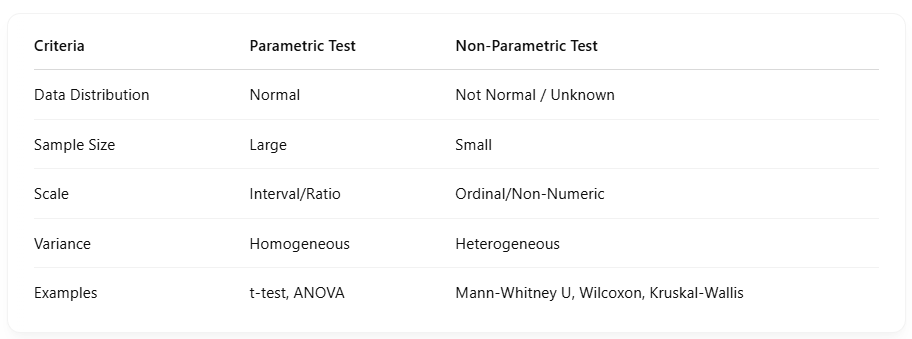

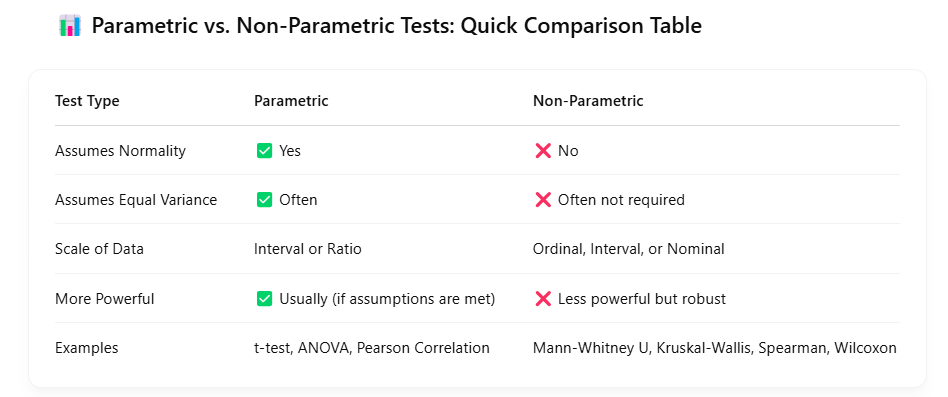

##**Non-Parametric Tests Overview**

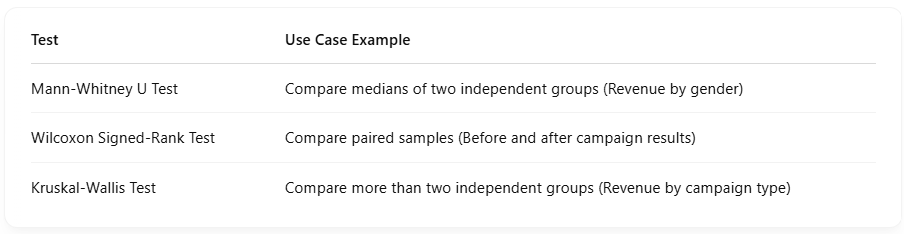

###**1. Mann-Whitney U Test (Non-parametric alternative to Two-Sample t-test)**

**When to Use:** Same goal as above, but normality not assumed

**Assumptions:**

- Ordinal or continuous scale

- Independent samples

**Hypotheses:**

H₀: Distributions are equal (no difference)

H₁: Distributions are different

In [ ]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(north, south, alternative='two-sided')
print(f"Mann-Whitney U: Statistic = {stat:.4f}, p-value = {p:.4f}")


Mann-Whitney U: Statistic = 1192.0000, p-value = 0.2972


###**2. Wilcoxon Signed-Rank Test (Non-parametric paired test)**

**When to Use:** Same as paired t-test, but for non-normal differences

In [ ]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(sales_data['before_sales'], sales_data['after_sales'])
print(f"Wilcoxon Signed-Rank: Statistic = {stat:.4f}, p-value = {p:.4f}")


Wilcoxon Signed-Rank: Statistic = 7632.0000, p-value = 0.0032


###**3. Kruskal-Wallis Test (Non-parametric ANOVA)**

In [ ]:
from scipy.stats import kruskal

stat, p = kruskal(email, social, tv)
print(f"Kruskal-Wallis Test: Statistic={stat:.4f}, p-value={p:.4f}")


Kruskal-Wallis Test: Statistic=4.6208, p-value=0.0992


###**4. Chi-Square Test of Independence**

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(sales_data['gender'], sales_data['email_open'])
contingency


email_open,No,Yes
gender,,
Female,45,58
Male,48,49


In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-Square: χ²={chi2:.4f}, p-value={p:.4f}")

Chi-Square: χ²=0.4616, p-value=0.4969


### **5. Chi-Square Goodness of Fit Test**

**When to Use:** Does observed frequency differ from expected?

It is used to determine if there's a significant difference between observed data and expected data when dealing with categorical variables.


**Hypotheses:**

H₀: Observed = Expected

H₁: Observed ≠ Expected

In [ ]:
from scipy.stats import chisquare

observed = [100, 98, 116]  # Observed customers across 3 campaigns
expected = [116, 108, 115]

# Ensure the sum of expected frequencies equals the sum of observed frequencies
expected[-1] = sum(observed) - sum(expected[:-1])  # Adjust the last expected value

stat, p = chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-square Goodness of Fit: Stat={stat:.4f}, p={p:.4f}")

Chi-square Goodness of Fit: Stat=10.6439, p=0.0049
